# Analisis Predictivo de Series Temporales

## Curso 2022 - Universidad ORT Uruguay

## Parcial - Fecha 12/12

### Nombre del estudiante: [completar]

In [2]:
## Ejemplo: instalación de astsadata usando pip:
#!pip install astsadata

## Ajusto tamaño de figuras
import matplotlib.pyplot as plt
import astsadata as astsa
import statsmodels.api as sm
import pandas as pd

plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.constrained_layout.use'] = True

c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Matias\anaconda3\lib\site-packages\p

### Ejercicio 1

Se considera la serie `cardox` de la biblioteca `astsa`, que registra los niveles de $CO_2$ en el observatorio de Mauna Loa, Hawaii. La misma se grafica abajo.

1. Realizar un ajuste de tendencia lineal para la serie. Discutir el resultado.
2. Agregar un término de tendencia cuadrática $x = \beta_0 + \beta_1 t + \beta_2 t^2 + w_t$ y discutir si mejora respecto al anterior.
3. Realizar un periodograma de los residuos para encontrar componentes estacionales (por ej. anuales).
4. Incluir en la regresión tanto los términos de tendencia como estacionales que considere adecuados y realizar el ajuste.
5. Discutir los residuos obtenidos. ¿Queda información por extraer? (No se pide realizar más ajustes)

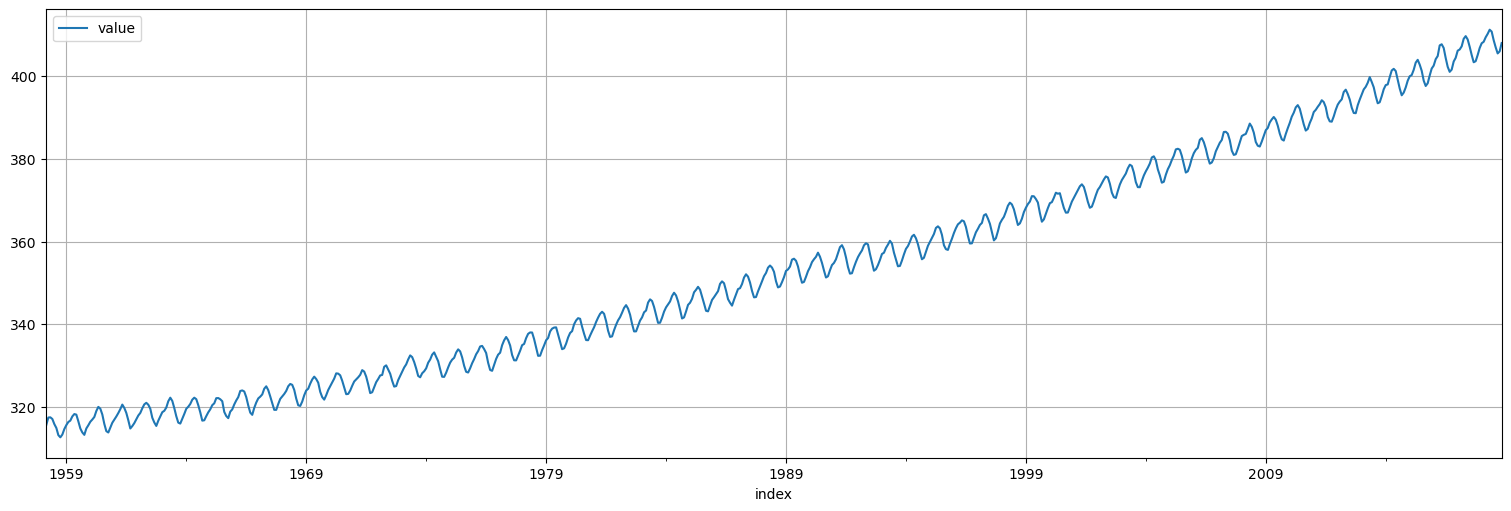

In [3]:
cardox = astsa.cardox
cardox.plot();

In [4]:
cardox.head()

,value
index,
1958-03,315.71
1958-04,317.45
1958-05,317.50
1958-06,317.10
1958-07,315.86


1. Realizar un ajuste de tendencia lineal para la serie. Discutir el resultado.

In [5]:
from statsmodels.formula.api import ols

# Convertir el índice temporal a datetime y luego a números ordinales
cardox_transf = pd.Series([idx.to_timestamp().toordinal() for idx in cardox.index], index=cardox.index)
data_reg = pd.concat([cardox_transf, cardox['value']], axis=1)
data_reg.columns = ["time", "value"]

# Ajuste del modelo de regresión lineal
fit = ols(formula="value ~ time", data=data_reg).fit()

# Resumen del modelo
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.166e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:10   Log-Likelihood:                -2067.3
No. Observations:                 729   AIC:                             4139.
Df Residuals:                     727   BIC:                             4148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2730.7993     17.335   -157.530      0.0

R-squared (R-cuadrado):

Valor: 0.978
Interpretación: Esto indica que el 97.8% de la variabilidad en la variable dependiente (value) puede ser explicada por la variable independiente (time). Es un valor muy alto, lo que sugiere un buen ajuste del modelo a los datos.

Adj. R-squared (R-cuadrado ajustado):

Valor: 0.978
Interpretación: Similar al R-cuadrado, pero ajustado por el número de predictores en el modelo. En este caso, es igual al R-cuadrado porque solo hay un predictor, lo que confirma la calidad del ajuste.

F-statistic:

Valor: 3.166e+04 (31,660)
Prob (F-statistic): 0.000
Interpretación: La estadística F mide la relación entre la variabilidad explicada por el modelo y la variabilidad no explicada. Un valor muy alto y una probabilidad de F muy baja (cercana a 0) indican que el modelo es significativo.

Coeficientes:

Intercept:

Coeficiente: -2730.7993
Error estándar: 17.335
t-valor: -157.530
P>|t|: 0.000
Intervalo de confianza 95%: [-2764.832, -2696.766]
time:

Coeficiente: 0.0042
Error estándar: 2.39e-05
t-valor: 177.946
P>|t|: 0.000
Intervalo de confianza 95%: [0.004, 0.004]
Interpretación: Ambos coeficientes son altamente significativos (P < 0.05), lo que indica que la variable time tiene un efecto significativo en value. El coeficiente de time es positivo, lo que sugiere una tendencia creciente en los valores a lo largo del tiempo.



Diagnósticos adicionales:

Omnibus y Prob(Omnibus):
Valor: 33.921
Probabilidad: 0.000
Interpretación: La prueba de Omnibus verifica la normalidad de los residuos. Un valor significativo (P < 0.05) sugiere que los residuos pueden no ser normalmente distribuidos. UNA TECNICA EN CASOS DE DISTRIBUCION QUE NO ES NORMAL ES APLICAR TRANSFORMACION LOGARITIMICA.


Durbin-Watson:
Valor: 0.089
Interpretación: Este valor cercano a 0 indica la presencia de autocorrelación positiva en los residuos, lo que sugiere que los errores están correlacionados con el tiempo, una situación común en series temporales.



Jarque-Bera (JB):
Valor: 36.737
Prob(JB): 1.05e-08
Interpretación: Similar a la prueba de Omnibus, verifica la normalidad de los residuos. El valor menor a 0.05 indica que los residuos no distribuyen normalmente. Aplicar transformacion logaritimica.



Skew y Kurtosis:
Skew (Asimetría): 0.532
Kurtosis: 2.720
Interpretación: La asimetría positiva indica que los residuos tienen una cola más larga a la derecha. La kurtosis cercana a 3 sugiere que los residuos tienen una distribución normal, aunque ligeramente achatada.


2. Agregar un término de tendencia cuadrática $x = \beta_0 + \beta_1 t + \beta_2 t^2 + w_t$ y discutir si mejora respecto al anterior.

In [6]:
# Agregar el término cuadrático
data_reg['time_squared'] = data_reg['time'] ** 2

# Ajuste del modelo de regresión cuadrática
fit_quadratic = ols(formula="value ~ time + time_squared", data=data_reg).fit()

# Resumen del modelo cuadrático
print(fit_quadratic.summary())

# Comparar AIC y BIC de ambos modelos
print("\nComparación de modelos:")
print(f"Modelo Lineal: AIC = {fit.aic}, BIC = {fit.bic}")
print(f"Modelo Cuadrático: AIC = {fit_quadratic.aic}, BIC = {fit_quadratic.bic}")


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.432e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:10   Log-Likelihood:                -2038.6
No. Observations:                 729   AIC:                             4081.
Df Residuals:                     727   BIC:                             4090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.035e-09   6.33e-11   -142.798   

Análisis breve de la comparación entre modelos:
Modelo Lineal:
AIC: 4138.60
BIC: 4147.78
R-cuadrado (R-squared): 0.978
R-cuadrado ajustado (Adj. R-squared): 0.978
Modelo Cuadrático:
AIC: 4081.17
BIC: 4090.35
R-cuadrado (R-squared): 0.979
R-cuadrado ajustado (Adj. R-squared): 0.979
Observaciones y Comparaciones:
R-cuadrado y R-cuadrado ajustado:

Ambos modelos tienen valores muy altos de R-cuadrado y R-cuadrado ajustado, indicando que explican casi toda la variabilidad en los datos.
El modelo cuadrático tiene un R-cuadrado y un R-cuadrado ajustado ligeramente superiores (0.979 frente a 0.978), lo que sugiere una mejora marginal en el ajuste al incluir el término cuadrático.
AIC (Criterio de Información de Akaike):

El AIC del modelo cuadrático (4081.17) es menor que el del modelo lineal (4138.60), lo que indica que el modelo cuadrático proporciona un mejor equilibrio entre ajuste y complejidad del modelo.
BIC (Criterio de Información Bayesiano):

El BIC del modelo cuadrático (4090.35) también es menor que el del modelo lineal (4147.78), reforzando la conclusión de que el modelo cuadrático es preferible según este criterio.
Significancia de los coeficientes:

Todos los coeficientes en el modelo cuadrático (Intercept, time, time_squared) son altamente significativos (p < 0.05), indicando que tanto el término lineal como el cuadrático contribuyen significativamente al modelo.
Multicolinealidad:

La nota sobre el número de condición alto (7.57e+15) en el modelo cuadrático sugiere posible multicolinealidad entre time y time_squared. Esto es común en modelos polinomiales y podría afectar la estabilidad de los coeficientes.
Conclusión:
El modelo cuadrático parece ser superior al modelo lineal en términos de AIC y BIC, lo que sugiere que incluye mejor la estructura de los datos. Sin embargo, la mejora en el R-cuadrado es marginal. La multicolinealidad indicada por el alto número de condición debe ser considerada, pero no parece afectar negativamente a la interpretación principal de que el modelo cuadrático ofrece una mejor descripción de la tendencia subyacente en los datos.

Por lo tanto, se recomienda utilizar el modelo cuadrático para capturar mejor la relación entre el tiempo y los valores, teniendo en cuenta las posibles implicaciones de la multicolinealidad.

## 3.  Realizar un periodograma de los residuos para encontrar componentes estacionales (por ej. anuales).

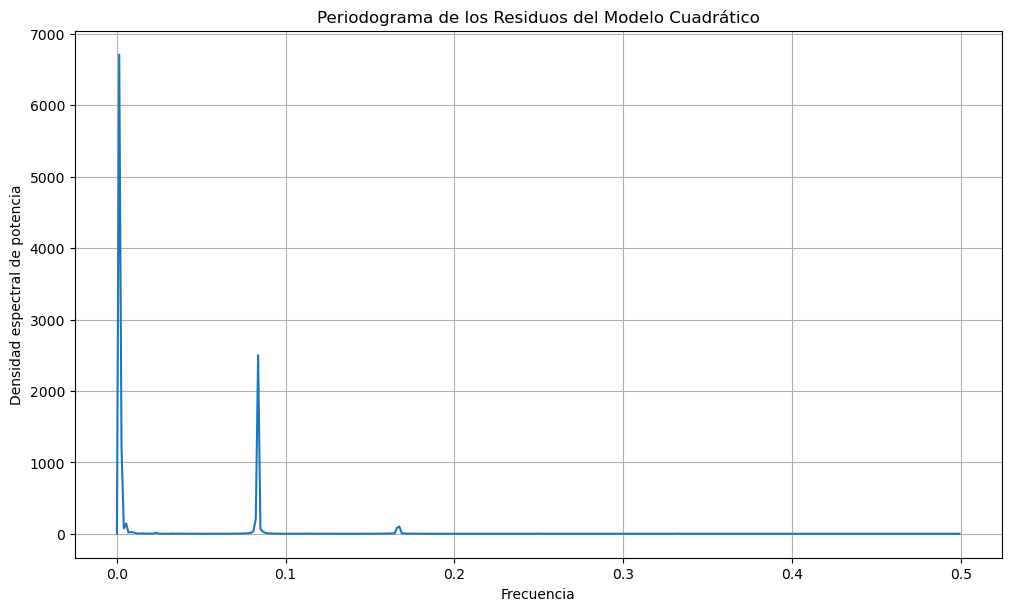

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import statsmodels.api as sm
import pandas as pd

# Asumiendo que data_reg es tu DataFrame con las columnas 'time' y 'value'
# y que ya has ajustado el modelo cuadrático

# Calcular los residuos del modelo cuadrático
data_reg['resid_quad'] = fit_quadratic.resid

# Generar el periodograma de los residuos
frequencies, power_spectral_density = periodogram(data_reg['resid_quad'])

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectral_density)
plt.title('Periodograma de los Residuos del Modelo Cuadrático')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


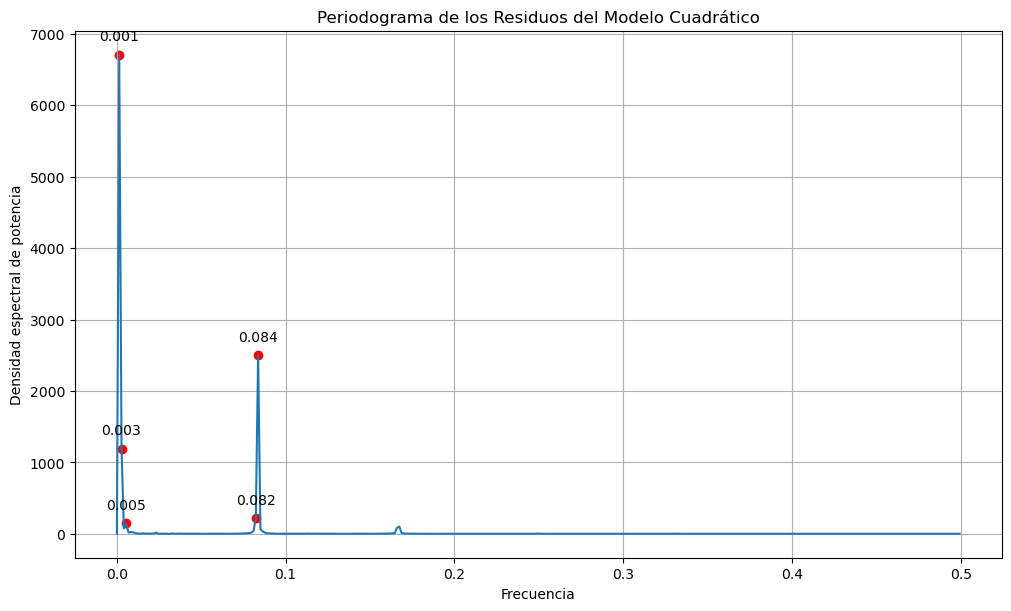

array([0.00548697, 0.08230453, 0.00274348, 0.08367627, 0.00137174])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Asumiendo que data_reg es tu DataFrame con las columnas 'time' y 'value'
# y que ya has ajustado el modelo cuadrático

# Calcular los residuos del modelo cuadrático
data_reg['resid_quad'] = fit_quadratic.resid

# Generar el periodograma de los residuos
frequencies, power_spectral_density = periodogram(data_reg['resid_quad'])

# Identificar picos en el periodograma
peak_indices = np.argsort(power_spectral_density)[-5:]  # Los 5 picos más altos
peak_frequencies = frequencies[peak_indices]
peak_powers = power_spectral_density[peak_indices]

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectral_density)
plt.scatter(peak_frequencies, peak_powers, color='red')
for i, freq in enumerate(peak_frequencies):
    plt.annotate(f'{freq:.3f}', (freq, peak_powers[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Periodograma de los Residuos del Modelo Cuadrático')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

# Mostrar las frecuencias de los picos
peak_frequencies


In [12]:
frequencies = np.array([0.001, 0.003, 0.005, 0.082, 0.084])
periods = 1 / frequencies
periods


array([1000.        ,  333.33333333,  200.        ,   12.19512195,
         11.9047619 ])

```python
Los períodos calculados a partir de las frecuencias encontradas en el periodograma son:

1000: Este período sugiere una tendencia muy larga y no es relevante para estacionalidad en el sentido clásico.
333.33: Similarmente, este período también indica una tendencia a largo plazo.
200: Este también parece ser una tendencia a largo plazo.
12.20: Este período es aproximadamente un año si tus datos son mensuales.
11.90: Este período también es aproximadamente un año, lo que indica una estacionalidad anual clara.
Por lo tanto, los períodos de 12.20 y 11.90 indican la presencia de estacionalidad anual en los residuos del modelo cuadrático. Esto sugiere que hay componentes estacionales anuales en tus datos que no fueron completamente capturados por el modelo cuadrático y se reflejan en los residuos.

Sería recomendable considerar estos resultados en el refinamiento de tu modelo, tal vez incorporando términos estacionales explícitos o utilizando modelos adicionales que puedan capturar estas componentes estacionales.
```

4. Incluir en la regresión tanto los términos de tendencia como estacionales que considere adecuados y realizar el ajuste.

In [7]:
import pandas as pd
from statsmodels.formula.api import ols

# Crear variables dummy para los meses
data_reg['month'] = data_reg.index.month
data_reg = pd.get_dummies(data_reg, columns=['month'], drop_first=True)

# Ajuste del modelo de regresión con términos de tendencia y estacionales
formula = "value ~ time + time_squared + " + " + ".join([f"month_{i}" for i in range(2, 13)])
fit_seasonal = ols(formula=formula, data=data_reg).fit()

# Resumen del modelo
print(fit_seasonal.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3909.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:10   Log-Likelihood:                -1921.3
No. Observations:                 729   AIC:                             3869.
Df Residuals:                     716   BIC:                             3928.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      2.16e-06    1.1e-05      0.197   

### Ejercicio 2

Se considera la serie `Nile` incluida con `R` con las medidas anuales de flujo en unidades de $10^8 m^3$ sobre la represa de Asswan.

1. Discutir brevemente si la serie es estacionaria.
2. Realizar un análisis de la autocorrelación y autocorrelación parcial.
3. Realizar un ajuste a un modelo $ARMA(p,q)$ adecuado. Puede incorporar dos modelos para comparar.
4. Analizar los residuos resultantes.
5. Realizar una predicción a 5 años hacia adelante.

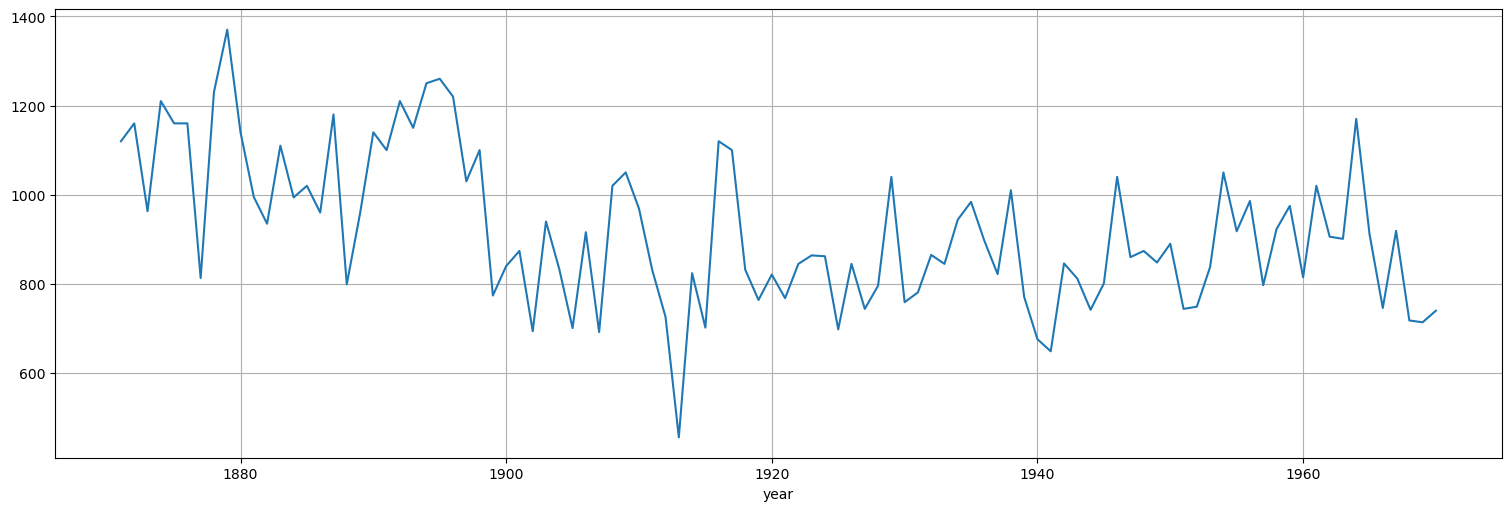

In [8]:
nile = sm.datasets.nile.load()
nile = pd.Series(nile["data"]["volume"].values, index=nile["data"]["year"])
nile.plot();

### Ejercicio 3

Se considera la serie $x$ de niveles de $CO$, así como la serie $y$ de mortalidad semanal por causas respiratorias. Ambas son parte del objeto `lap` de la biblioteca `astsa`. Ambas series comienzan en $1970$ y tienen una frecuencia semanal (`freq=52`).

1. Analice la correlación cruzada entre ambas series.
2. ¿Para que valor de lag se da la mayor correlación entre ambas?
3. Se propone un modelo de la forma $y_t = \beta_0 + \beta_1 x_{t-l} + w_t$ con $x$ e $y$ como antes y $l$ el lag de la parte anterior. Realice un ajuste lineal para estimar los parámetros $\beta_0$ y $\beta_1$.
4. ¿Cuánto de la varianza de la serie original se explica por la relación entre $x$ e $y$?
5. Realice un gráfico de la predicción del modelo (no olvide que la primera predicción será luego de $l$ lags) y la mortalidad observada. 
6. Analice los residuos del modelo y discuta si aún queda información por ajustar.

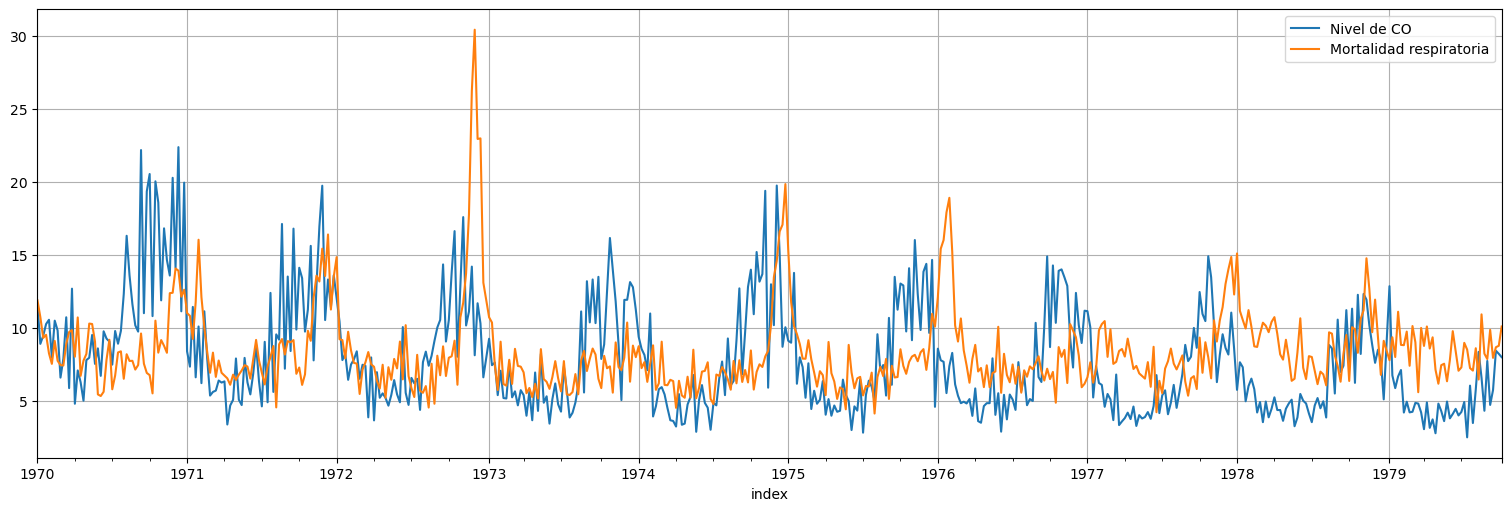

In [9]:
x = astsa.lap["co"]
y = astsa.lap["rmort"]

x.plot(label="Nivel de CO");
y.plot(label="Mortalidad respiratoria");
plt.legend();